In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


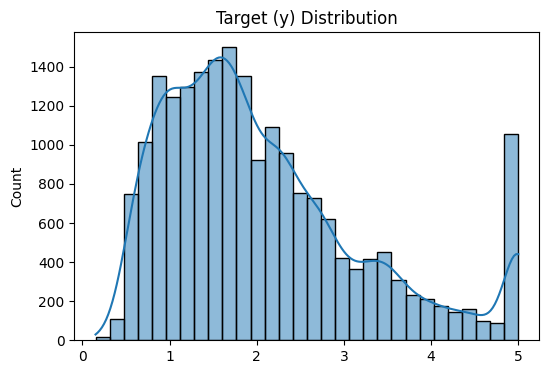

In [4]:
from sklearn.datasets import fetch_california_housing
import numpy as np

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

X = X.values.astype(float)
y = np.array(y).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True, bins=30)
plt.title("Target (y) Distribution")
plt.show()

# Distance

In [5]:
proposal_probs = {"multi_grow": 0.25, "multi_prune": 0.25, "multi_change": 0.4, "multi_swap": 0.1}
bart_mtmh = MultiBART(ndpost=1000, nskip=0, n_trees=100, proposal_probs=proposal_probs, multi_tries=10)
bart_mtmh.fit(X_train, y_train)
f_vectors_mtmh = bart_mtmh.posterior_f(X_train).T

Iterations: 100%|██████████| 1000/1000 [03:54<00:00,  4.26it/s]


In [6]:
proposal_probs = {"grow": 0.25, "prune": 0.25, "change": 0.4, "swap": 0.1}
bart_default = DefaultBART(ndpost=1000, nskip=0, n_trees=100, proposal_probs=proposal_probs)
bart_default.fit(X_train, y_train)
f_vectors_default = bart_default.posterior_f(X_train).T

Iterations: 100%|██████████| 1000/1000 [00:26<00:00, 37.79it/s]


In [7]:
def vector_distance_seq(vectors, norm_type='l2'):
    vectors = np.array(vectors)
    dists = []
    for i in range(1, len(vectors)):
        if norm_type == 'l2':
            dist = np.linalg.norm(vectors[i] - vectors[i-1])
        elif norm_type == 'l1':
            dist = np.sum(np.abs(vectors[i] - vectors[i-1]))
        else:
            raise ValueError("norm_type must be 'l1' or 'l2'")
        dists.append(dist)
    return np.array(dists)

## L2 distance

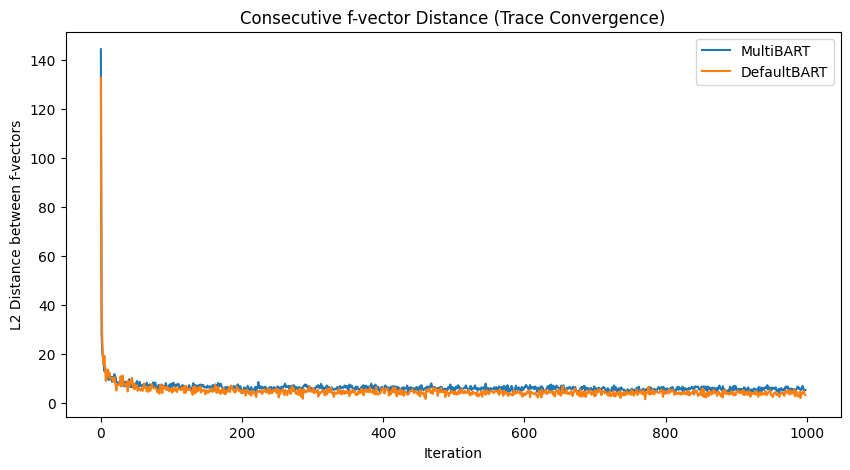

In [12]:
dists_mtmh = vector_distance_seq(f_vectors_mtmh, norm_type='l2')
dists_default = vector_distance_seq(f_vectors_default, norm_type='l2')

plt.figure(figsize=(10, 5))
plt.plot(dists_mtmh, label='MultiBART')
plt.plot(dists_default, label='DefaultBART')
plt.xlabel('Iteration')
plt.ylabel('L2 Distance between f-vectors')
plt.title('Consecutive f-vector Distance (Trace Convergence)')
plt.legend()
plt.show()

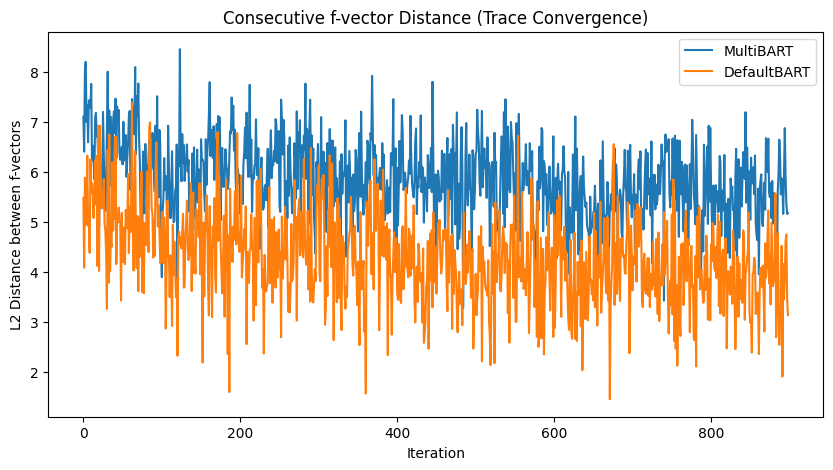

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(dists_mtmh[100:], label='MultiBART')
plt.plot(dists_default[100:], label='DefaultBART')
plt.xlabel('Iteration')
plt.ylabel('L2 Distance between f-vectors')
plt.title('Consecutive f-vector Distance (Trace Convergence)')
plt.legend()
plt.show()

## L1 distance

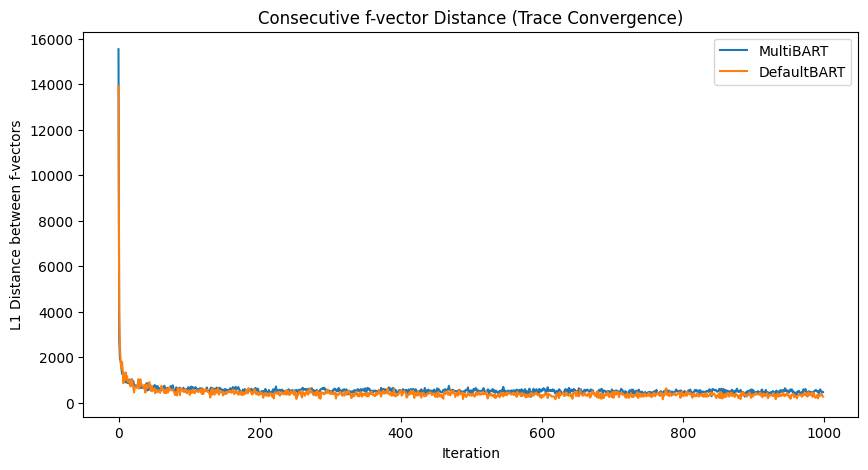

In [14]:
dists_mtmh = vector_distance_seq(f_vectors_mtmh, norm_type='l1')
dists_default = vector_distance_seq(f_vectors_default, norm_type='l1')

plt.figure(figsize=(10, 5))
plt.plot(dists_mtmh, label='MultiBART')
plt.plot(dists_default, label='DefaultBART')
plt.xlabel('Iteration')
plt.ylabel('L1 Distance between f-vectors')
plt.title('Consecutive f-vector Distance (Trace Convergence)')
plt.legend()
plt.show()

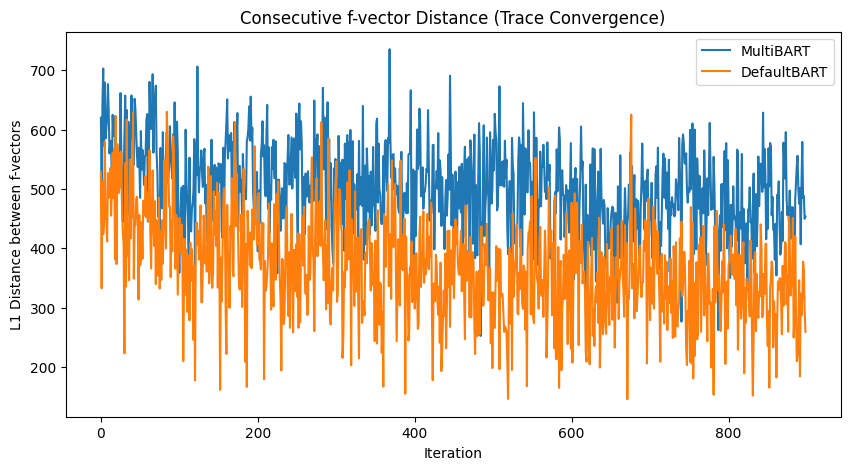

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(dists_mtmh[100:], label='MultiBART')
plt.plot(dists_default[100:], label='DefaultBART')
plt.xlabel('Iteration')
plt.ylabel('L1 Distance between f-vectors')
plt.title('Consecutive f-vector Distance (Trace Convergence)')
plt.legend()
plt.show()